Saving weatherAUS.csv to weatherAUS (3).csv
Dataset loaded: (145460, 23)

🔍 Random Forest
Accuracy: 0.8550977035244112
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     26252
           1       0.77      0.51      0.61      7626

    accuracy                           0.86     33878
   macro avg       0.82      0.73      0.76     33878
weighted avg       0.85      0.86      0.84     33878



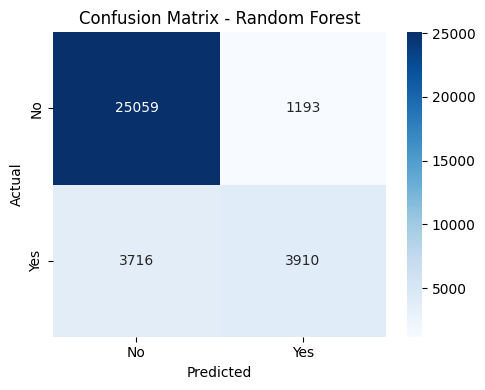

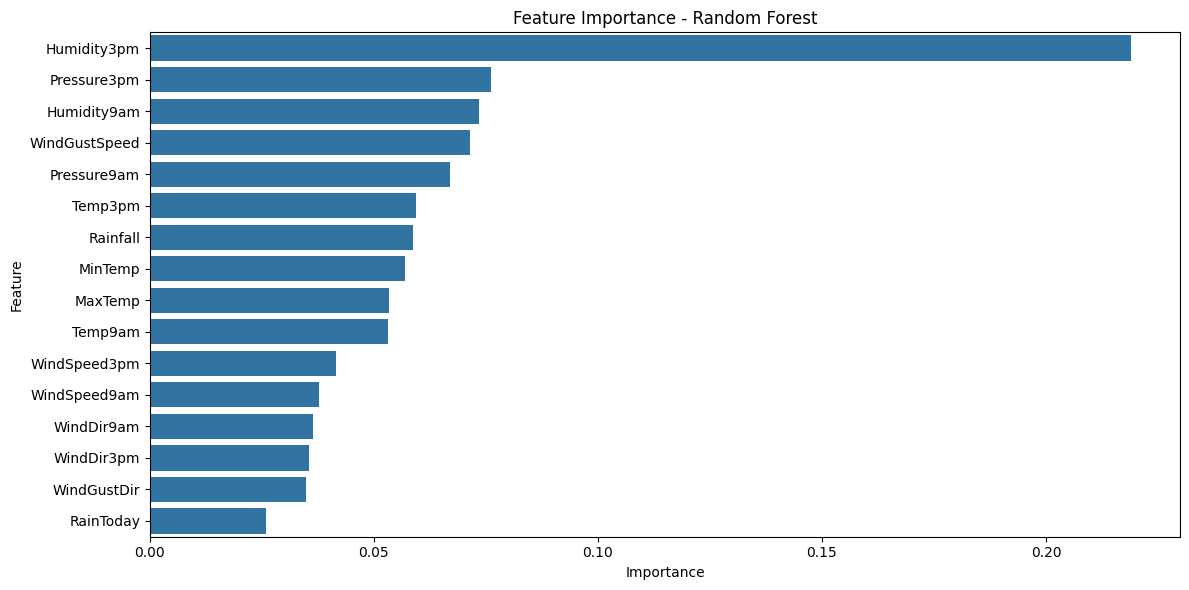

In [ ]:
# Install required packages
!pip install -q pandas matplotlib seaborn scikit-learn

# Step 1: Upload the CSV file manually
from google.colab import files
uploaded = files.upload()

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Load the dataset
df = pd.read_csv("weatherAUS.csv")
print("Dataset loaded:", df.shape)

# Step 4: Data preprocessing
df = df.drop(['Date', 'Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, errors='ignore')
df = df.dropna()

label_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
le = LabelEncoder()
for col in label_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 5: Train models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluation function with confusion matrix plot
def evaluate(name, y_true, y_pred):
    print(f"\n🔍 {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Step 7: Evaluate only Random Forest model
evaluate("Random Forest", y_test, y_pred_rf)

# Step 8: Feature importance (Random Forest only)
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
